## Assignment Description:
At Sunbase, we prioritize understanding our customers and ensuring their satisfaction. To achieve this, 
we want to develop a machine learning model that predicts customer churn. Your task as a Machine 
Learning Intern is to work on this project, following the guidelines and responsibilities outlined in the job 
description.

## Objective:
Develop a machine learning model to predict customer churn based on historical customer data. You 
will follow a typical machine learning project pipeline, from data preprocessing to model deployment.

## Data:
You are provided with a dataset containing historical customer information, including customer 
attributes, interactions, and whether they churned or not. The dataset is in CSV format.

## Tasks:

## 1. Data Preprocessing:
 Load the provided dataset and perform initial data exploration.
 Handle missing data and outliers.
 Prepare the data for machine learning by encoding categorical variables and splitting it into 
training and testing sets.

## 2. Feature Engineering:
 Generate relevant features from the dataset that can help improve the model's prediction 
accuracy.
 Apply feature scaling or normalization if necessary.

## 3. Model Building:
 Choose appropriate machine learning algorithms (e.g., logistic regression, random forest, or 
neural networks).
 Train and validate the selected model on the training dataset.
 Evaluate the model's performance using appropriate metrics (e.g., accuracy, precision, recall, 
F1-score).

## 4. Model Optimization:
 Fine-tune the model parameters to improve its predictive performance.
 Explore techniques like cross-validation and hyperparameter tuning.

## 5. Model Deployment:
 Once satisfied with the model's performance, deploy it into a production-like 
environment (you can simulate this in a development environment).
 Ensure the model can take new customer data as input and provide churn predictions.


# Preparing Tools

In [1]:
#Regular EDA (Exploring data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline  

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


#Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

# Load Data

In [173]:
df = pd.read_csv("Customer_churn_large_dataset.csv")
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


# Data Preprocessing

In [175]:
df.shape

(100000, 9)

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [177]:
df.isna().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [179]:
df["Churn"].value_counts()

0    50221
1    49779
Name: Churn, dtype: int64

In [194]:
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


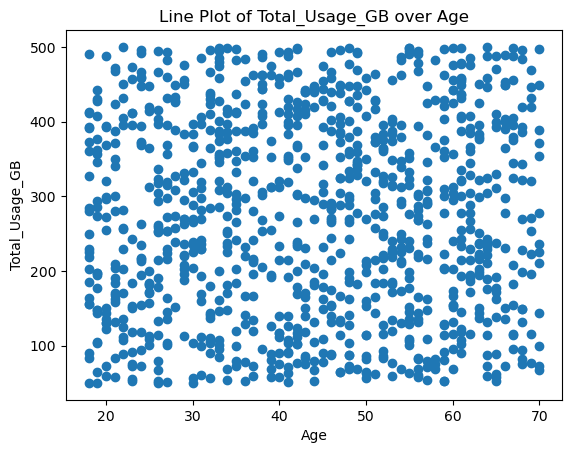

In [187]:
subset= df.head(1000)
plt.scatter(subset['Age'], subset['Total_Usage_GB'])
plt.xlabel('Age')
plt.ylabel('Total_Usage_GB')
plt.title('Line Plot of Total_Usage_GB over Age')
plt.show()



In [188]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


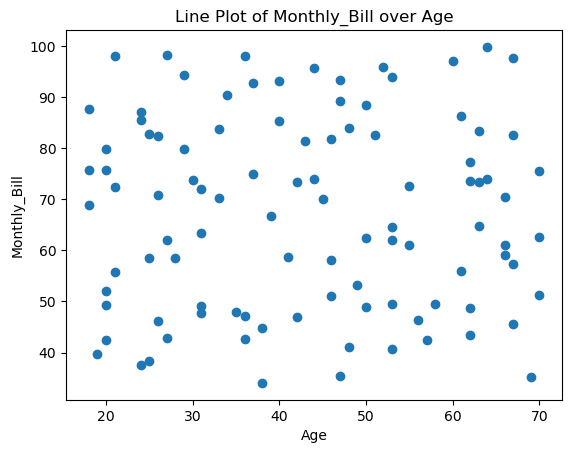

In [191]:
subset= df.head(100)
plt.scatter(subset['Age'], subset['Monthly_Bill'])
plt.xlabel('Age')
plt.ylabel('Monthly_Bill')
plt.title('Line Plot of Monthly_Bill over Age')
plt.show()


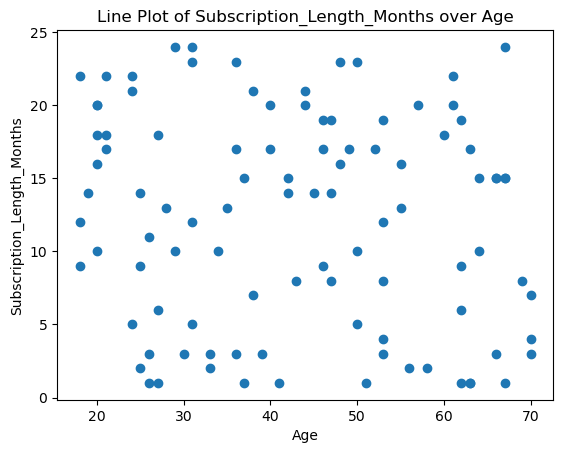

In [192]:
subset= df.head(100)
plt.scatter(subset['Age'], subset['Subscription_Length_Months'])
plt.xlabel('Age')
plt.ylabel('Subscription_Length_Months')
plt.title('Line Plot of Subscription_Length_Months over Age')
plt.show()

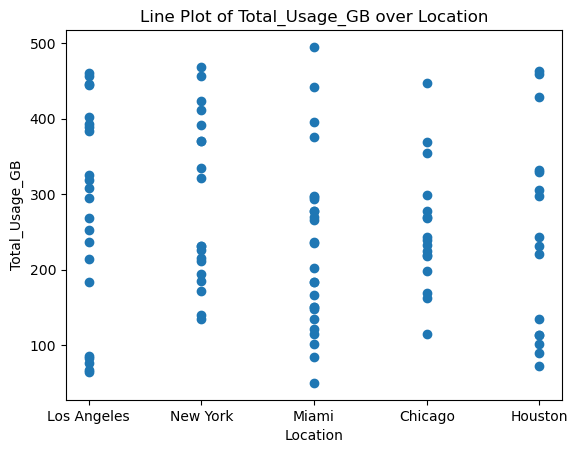

In [193]:
subset= df.head(100)
plt.scatter(subset['Location'], subset['Total_Usage_GB'])
plt.xlabel('Location')
plt.ylabel('Total_Usage_GB')
plt.title('Line Plot of Total_Usage_GB over Location')
plt.show()

In [195]:
df.corr()

C:\Users\HP\AppData\Local\Temp\ipykernel_14916\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
CustomerID,1.000000,-0.001085,0.005444,0.001265,-0.004025,-0.004586
Age,-0.001085,1.000000,0.003382,0.001110,0.001927,0.001559
Subscription_Length_Months,0.005444,0.003382,1.000000,-0.005294,-0.002203,0.002328
Monthly_Bill,0.001265,0.001110,-0.005294,1.000000,0.003187,-0.000211
Total_Usage_GB,-0.004025,0.001927,-0.002203,0.003187,1.000000,-0.002842
Churn,-0.004586,0.001559,0.002328,-0.000211,-0.002842,1.000000


C:\Users\HP\AppData\Local\Temp\ipykernel_14916\870118827.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


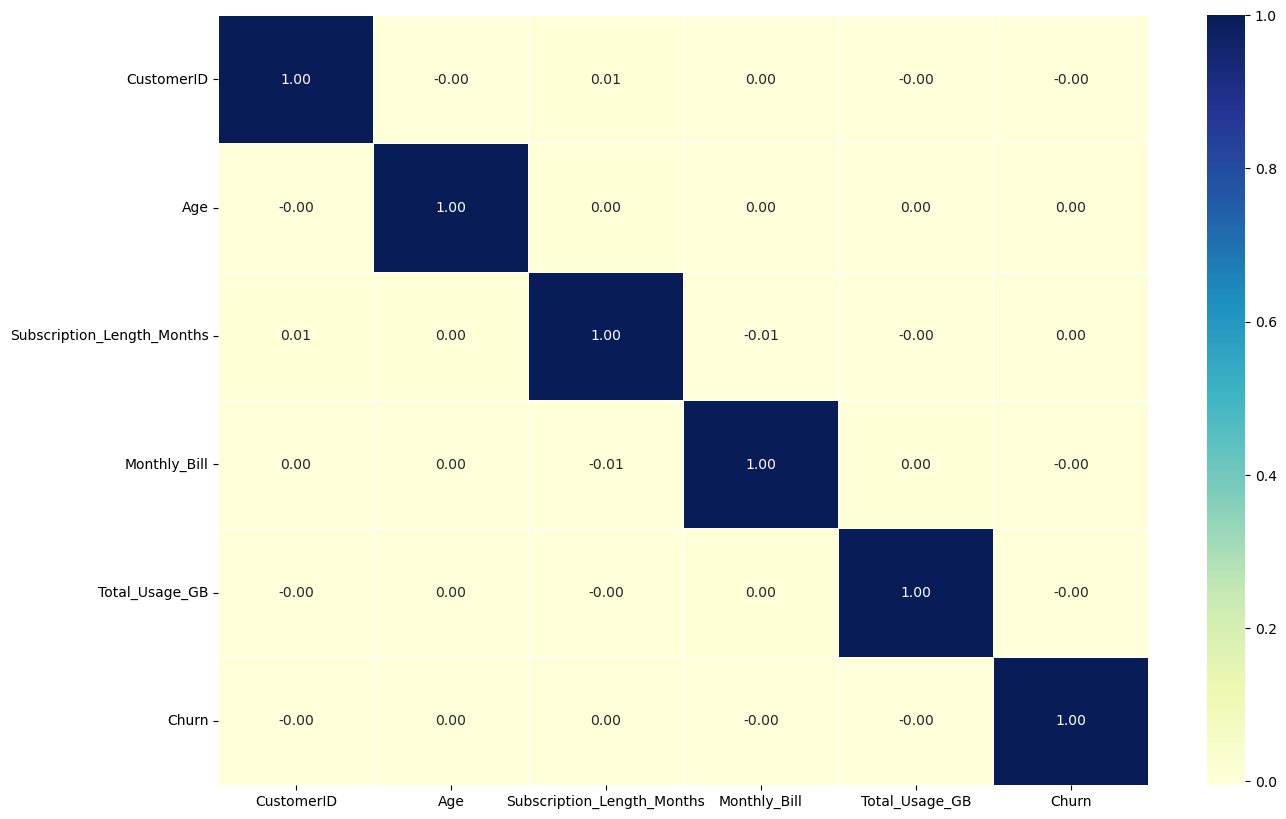

In [196]:
# Let's make our correlation matrix a little better
corr_matrix = df.corr()
fig, ax= plt.subplots(figsize= (15,10))
ax= sns.heatmap(corr_matrix,
               annot =True,
               linewidths= 0.5,
                fmt= ".2f",
               cmap="YlGnBu");


Poor correlation 

In [208]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [209]:
# split data in X and y
X= df.drop("Churn", axis=1)
y = df["Churn"]

In [210]:
X

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236
1,2,Customer_2,62,Female,New York,1,48.76,172
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460
3,4,Customer_4,36,Female,Miami,3,97.94,297
4,5,Customer_5,46,Female,Miami,19,58.14,266
...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226
99996,99997,Customer_99997,62,Female,New York,19,61.65,351
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251
99998,99999,Customer_99999,51,Female,New York,20,49.25,434


In [211]:
X= X.drop("Name",axis=1)
X= X.drop("CustomerID", axis=1)

X.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
0,63,Male,Los Angeles,17,73.36,236
1,62,Female,New York,1,48.76,172
2,24,Female,Los Angeles,5,85.47,460
3,36,Female,Miami,3,97.94,297
4,46,Female,Miami,19,58.14,266


In [212]:
# Perform one-hot encoding using get_dummies for location
X = pd.get_dummies(X, columns=['Location'], prefix=['Location'])




In [213]:
X.head()

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,63,Male,17,73.36,236,0,0,1,0,0
1,62,Female,1,48.76,172,0,0,0,0,1
2,24,Female,5,85.47,460,0,0,1,0,0
3,36,Female,3,97.94,297,0,0,0,1,0
4,46,Female,19,58.14,266,0,0,0,1,0


In [214]:
X["Gender"]=X["Gender"].replace({"Male":0, "Female":1})

In [215]:
X.head()

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,63,0,17,73.36,236,0,0,1,0,0
1,62,1,1,48.76,172,0,0,0,0,1
2,24,1,5,85.47,460,0,0,1,0,0
3,36,1,3,97.94,297,0,0,0,1,0
4,46,1,19,58.14,266,0,0,0,1,0


In [216]:
y

0        0
1        0
2        0
3        1
4        0
        ..
99995    1
99996    0
99997    1
99998    1
99999    1
Name: Churn, Length: 100000, dtype: int64

In [217]:
# Split data into train and test sets
np.random.seed(42)

# split into train and test
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2)

In [218]:
X_train

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
75220,54,1,5,84.50,205,0,0,0,0,1
48955,28,0,24,82.06,239,0,0,0,0,1
44966,57,0,12,52.29,62,1,0,0,0,0
13568,19,0,19,32.57,173,0,1,0,0,0
92727,56,1,8,33.52,314,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
6265,35,0,21,67.33,235,0,0,0,1,0
54886,56,0,13,85.40,347,1,0,0,0,0
76820,69,0,2,76.24,321,0,1,0,0,0
860,55,0,12,89.19,315,1,0,0,0,0


Now we've got our data split into training and test sets, it's time to build a ML model.
> Train it (find patterns) on the training set.

> And test it (using the patterns) on the test set.

> Trying 3 different models:
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [219]:
# Put models in a dictionary
models= {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}


#Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluate the given ML Models.
    models: a dict of different Scikit-Learn ML models.
    X_train: Training data(no labels)
    X_test: training data(no labels)
    y_train: training labels
    y_test : test_labels
    """
    
    #Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores ={}
    #Loop through models
    for name, model in models.items():
        #Fit the model to the data
        model.fit(X_train,y_train)
        #Evaluate the model and append its score to model_scores
        model_scores[name]= model.score(X_test,y_test)
    return model_scores


In [220]:
model_scores =fit_and_score(models=models,
                           X_train=X_train,
                           X_test=X_test,
                           y_train=y_train,
                           y_test=y_test)
model_scores

{'Logistic Regression': 0.4999, 'KNN': 0.497, 'Random Forest': 0.4952}

# Model comparasion

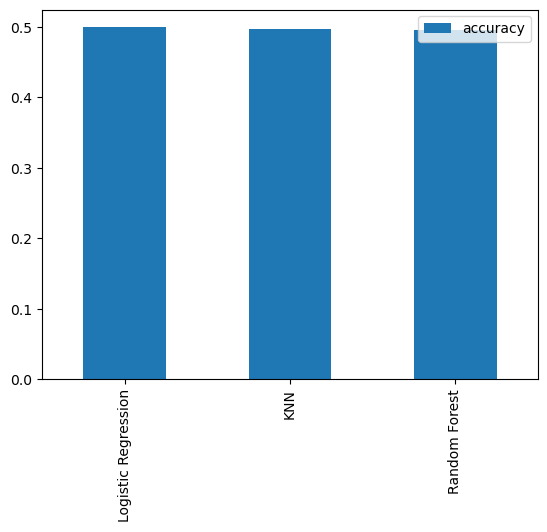

In [221]:
model_compare =pd.DataFrame(model_scores, index= ["accuracy"])
model_compare.T.plot.bar();

Now we've got a baseline model... and we know a model's first predictions aren't always what we should based our next steps off.

What should we do?

Let's look at the following:
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross validation
* Precision
* Recall
* F1 score
* Classifiaction Report
* ROC curve
* Area under the curve (AUC)

## Hyperparameter Tuning

In [222]:
# Tune KNN
train_scores= []
test_scores=[]

#Create a lsit of different values for n_neighbors
neighbors = range(1,21)

#setup KNN instances
knn= KNeighborsClassifier()

#Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    #Fit the algo
    knn.fit(X_train,y_train)
    
    #Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    #Update the test scores list
    test_scores.append(knn.score(X_test,y_test))

In [223]:
train_scores

[1.0,
 0.7504625,
 0.7508375,
 0.6879,
 0.6879,
 0.6581875,
 0.6579,
 0.6370125,
 0.63665,
 0.625325,
 0.623625,
 0.6144125,
 0.6133375,
 0.6066375,
 0.6045375,
 0.5982875,
 0.5972,
 0.5927,
 0.5911875,
 0.587825]

In [224]:
test_scores

[0.49785,
 0.5028,
 0.49735,
 0.5014,
 0.497,
 0.49815,
 0.49375,
 0.498,
 0.49765,
 0.49815,
 0.49555,
 0.4952,
 0.49795,
 0.4989,
 0.4998,
 0.50065,
 0.498,
 0.5026,
 0.5024,
 0.50425]

Maximum KNN score on the test data:  50.42


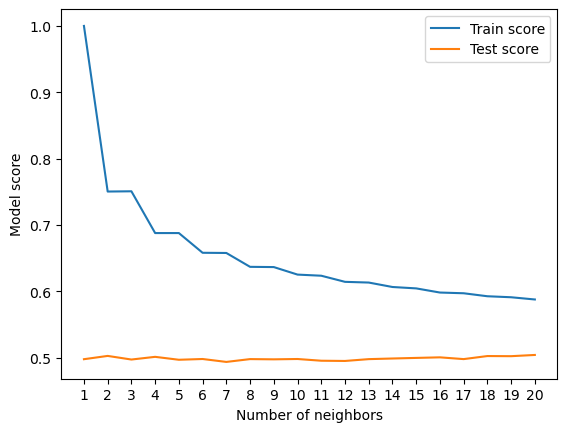

In [225]:
plt.plot(neighbors, train_scores, label= "Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100 : .2f}")

## Hyperparameter tuning with RandomizedSearchCV

We're going to tune :
* LogisticRegression()
* RandomForestClassifier()
...using RandomizedSearchCV

In [227]:
#Create a hyperparameter grid for LogisticRegression

log_reg_grid= {"C": np.logspace(-4, 4, 20),
               "solver":["liblinear"]}

#Create Hyperparameter grid for RandomizedForestClassifier
rf_grid= {"n_estimators": np.arange(10,1000,50),
         "max_depth":[None,3,5,10],
         "min_samples_split":np.arange(2,20,2),
         "min_samples_leaf": np.arange(1,20,2)}

Now we've got hyperparamters grids setup for each of our models,
let's tune them using RandomizedSearchCV

In [228]:
#Tune LogisticRegression
np.random.seed(42)

#Setup random hyperparameter search for LogisticRegression
rs_log_reg= RandomizedSearchCV(LogisticRegression(),
                              param_distributions= log_reg_grid,
                              cv=5,
                              n_iter=20,
                              verbose= True)

#Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [229]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.00026366508987303583}

In [230]:
rs_log_reg.score(X_test, y_test)

0.50085

Now For RandomForestClassifier()

In [231]:
#Setup random seed
np.random.seed(42)

#Setup random Hyperparameter search for RandomForestClassifier
rs_rf= RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions= rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose = True)
#Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [232]:
#Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 910,
 'min_samples_split': 18,
 'min_samples_leaf': 1,
 'max_depth': 10}

In [233]:
# Evaluate the randomized search  RandomForestClassifier model
rs_rf.score(X_test,y_test)

0.4997

## Hyperparameter Tuning with GridSearchCV

Continuing with LogisticRegression ahead

In [234]:
# Different Hyperparameters for our LogisticRegression model
log_reg_grid ={"C": np.logspace(-4, 4, 100),
               "solver": ["liblinear"]}

#Setup grid Hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                           param_grid = log_reg_grid,
                           cv=5,
                            verbose=True)

#Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [235]:
#Check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.0004430621457583882, 'solver': 'liblinear'}

In [236]:
#Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)

0.5011

## Evaluating our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC curve
* Confusion matrix
* Classification report
* Precision
* Recall
* F1 Score

..Also using cross validation on the way

To make comparisions and evaluate our trained model, first we need to make predictions.

In [237]:
#Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [238]:
y_test

75721    0
80184    0
19864    0
76699    1
92991    0
        ..
32595    0
29313    1
37862    1
53421    0
42410    1
Name: Churn, Length: 20000, dtype: int64

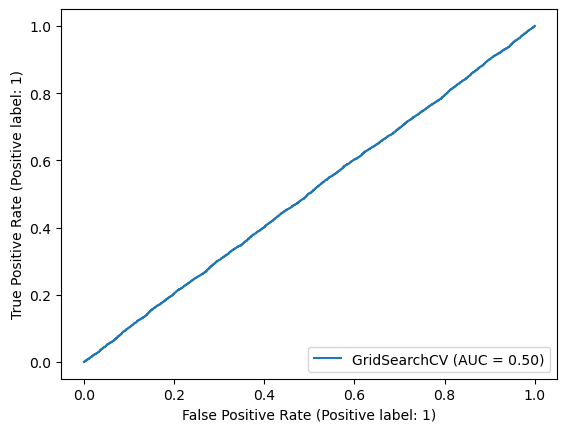

In [239]:
#Plot ROC Curve and calculate and AUC metric
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)

In [240]:
#Confusion matrix
print(confusion_matrix(y_test,y_preds))

[[6588 3491]
 [6487 3434]]


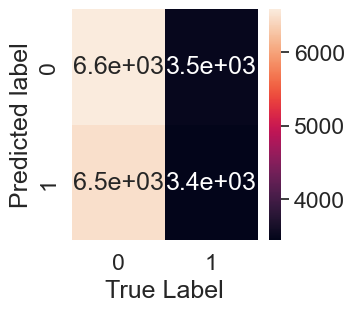

In [241]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Confusion matrix using Seaborn's heatmap()
    """
    
    fig, ax = plt.subplots(figsize=(3,3))
    ax= sns.heatmap(confusion_matrix(y_test, y_preds),
                   annot=True,
                   cbar= True)
    plt.xlabel("True Label")
    plt.ylabel("Predicted label")
    
plot_conf_mat(y_test,y_preds)

Now we've got a ROC curve, an AUC metric and a confusion matrix, let's get a classifiaction report as well as cross-validated precision, recall and f1 score

In [242]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.50      0.65      0.57     10079
           1       0.50      0.35      0.41      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.49     20000
weighted avg       0.50      0.50      0.49     20000



## Calculate evaluation metrics using cross validation
We're going to calculate precision, recall and f1-score of our model using cross- validation and to do so we'll be using cross_val_score().

In [243]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.0004430621457583882, 'solver': 'liblinear'}

In [244]:
#Create a new classifier with best parameters
clf= LogisticRegression(C= 0.20565123083486536,
                         solver= "liblinear")

In [245]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf, X,y , cv=5, scoring ="accuracy")
cv_acc

array([0.5034 , 0.49865, 0.50195, 0.50185, 0.50515])

In [246]:
cv_acc= np.mean(cv_acc)
cv_acc

0.5022

In [247]:
#Cross validated precision
cv_precision = cross_val_score(clf, X,y , cv=5, scoring ="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.5003500312162006

In [248]:
#Cross validated recall
cv_recall = cross_val_score(clf, X,y , cv=5, scoring ="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.4221051017243324

In [249]:
#Cross validated f1-score
cv_f1 = cross_val_score(clf, X,y , cv=5, scoring ="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.4549275887626184

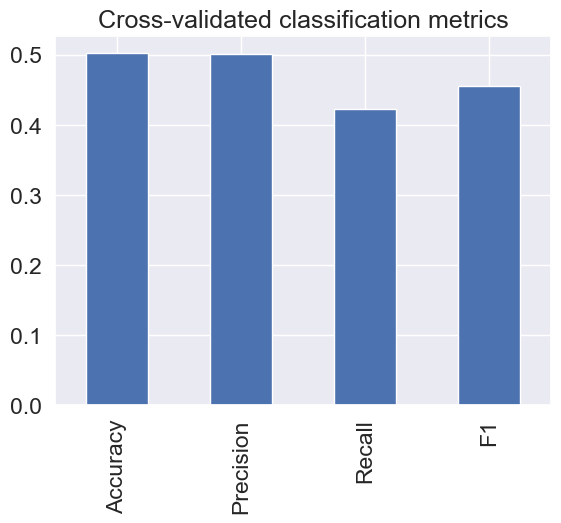

In [250]:
#Visualize cross-validated metrics
cv_metrics= pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_precision,
                           "Recall": cv_recall,
                            "F1": cv_f1},
                            index =[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend= False);

## Feature Importance

"Which features contributed most to the outcomes of the model and how did they contribute?"

it varies from model to model!

In [251]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [252]:
# Fit an instance of LogisticRegression
gs_log_reg.best_params_

clf= LogisticRegression(C=0.20565123083486536, solver = "liblinear")
clf.fit(X_train, y_train)

LogisticRegression(C=0.20565123083486536, solver='liblinear')

In [253]:
#Check coef
clf.coef_

array([[ 6.37703560e-04, -1.31014431e-02,  2.04956731e-05,
        -1.51253779e-04, -4.00208732e-05, -1.31474916e-02,
        -2.37841565e-02, -1.27539787e-02,  1.74314129e-02,
         2.55986375e-02]])

In [254]:
#Match coef's of features to columns 
feature_dict = dict(zip(df.columns, list (clf.coef_[0])))
feature_dict

{'CustomerID': 0.0006377035603594124,
 'Name': -0.013101443135050777,
 'Age': 2.0495673055298177e-05,
 'Gender': -0.0001512537791684755,
 'Location': -4.002087316401083e-05,
 'Subscription_Length_Months': -0.013147491567642926,
 'Monthly_Bill': -0.023784156488379556,
 'Total_Usage_GB': -0.012753978676097214,
 'Churn': 0.017431412938494945}

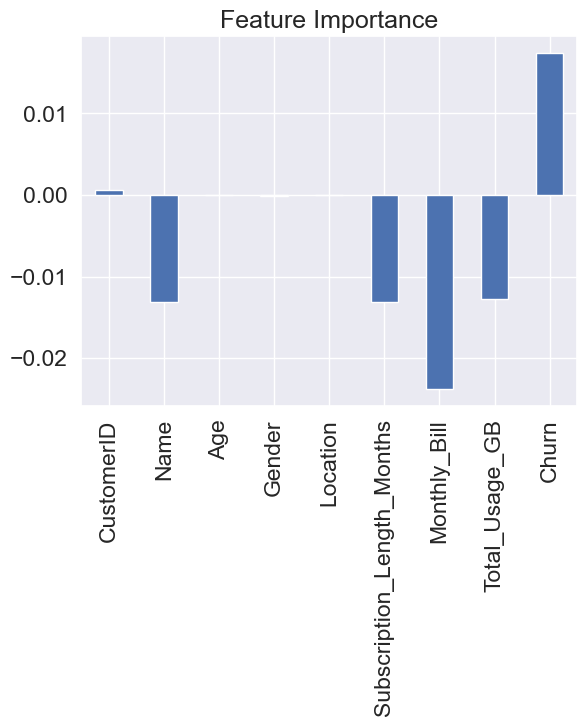

In [255]:
#Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend =False);

In [256]:
import pickle
pickle.dump(clf,open('churn.pkl','wb'))